<a href="https://colab.research.google.com/github/ParyaniSagar/Backorder_Prediction/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
df = pd.read_csv('/content/drive/MyDrive/Portfolio_Project/BO_Training_Dataset.csv')

<ipython-input-76-6e1eb4284e20>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Portfolio_Project/BO_Training_Dataset.csv')


In [77]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


# Exploratory Data Analysis



In [78]:
df.shape

(1687861, 23)

In [79]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [80]:
df.dtypes

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


In [82]:
stats_df = df.describe().T
len(stats_df.loc[stats_df['mean'] > stats_df['75%']])

12

12/15 featrues are right skewed. having mean value greater than 75th Percentile

In [83]:
# Percentage missing values
round((100*df.isnull().sum()/len(df)),0)

sku                  0.0
national_inv         0.0
lead_time            6.0
in_transit_qty       0.0
forecast_3_month     0.0
forecast_6_month     0.0
forecast_9_month     0.0
sales_1_month        0.0
sales_3_month        0.0
sales_6_month        0.0
sales_9_month        0.0
min_bank             0.0
potential_issue      0.0
pieces_past_due      0.0
perf_6_month_avg     0.0
perf_12_month_avg    0.0
local_bo_qty         0.0
deck_risk            0.0
oe_constraint        0.0
ppap_risk            0.0
stop_auto_buy        0.0
rev_stop             0.0
went_on_backorder    0.0
dtype: float64

In [84]:
rep_dict = {'perf_6_month_avg':-99,'perf_12_month_avg':-99}
df.replace(to_replace=rep_dict,value=np.NaN, inplace=True)

df['lead_time'] = df['lead_time'].fillna(df['lead_time'].mean())
df['perf_6_month_avg'] = df['perf_6_month_avg'].fillna(df['perf_6_month_avg'].mean())
df['perf_12_month_avg'] = df['perf_12_month_avg'].fillna(df['perf_12_month_avg'].mean())
df.dropna(inplace=True)

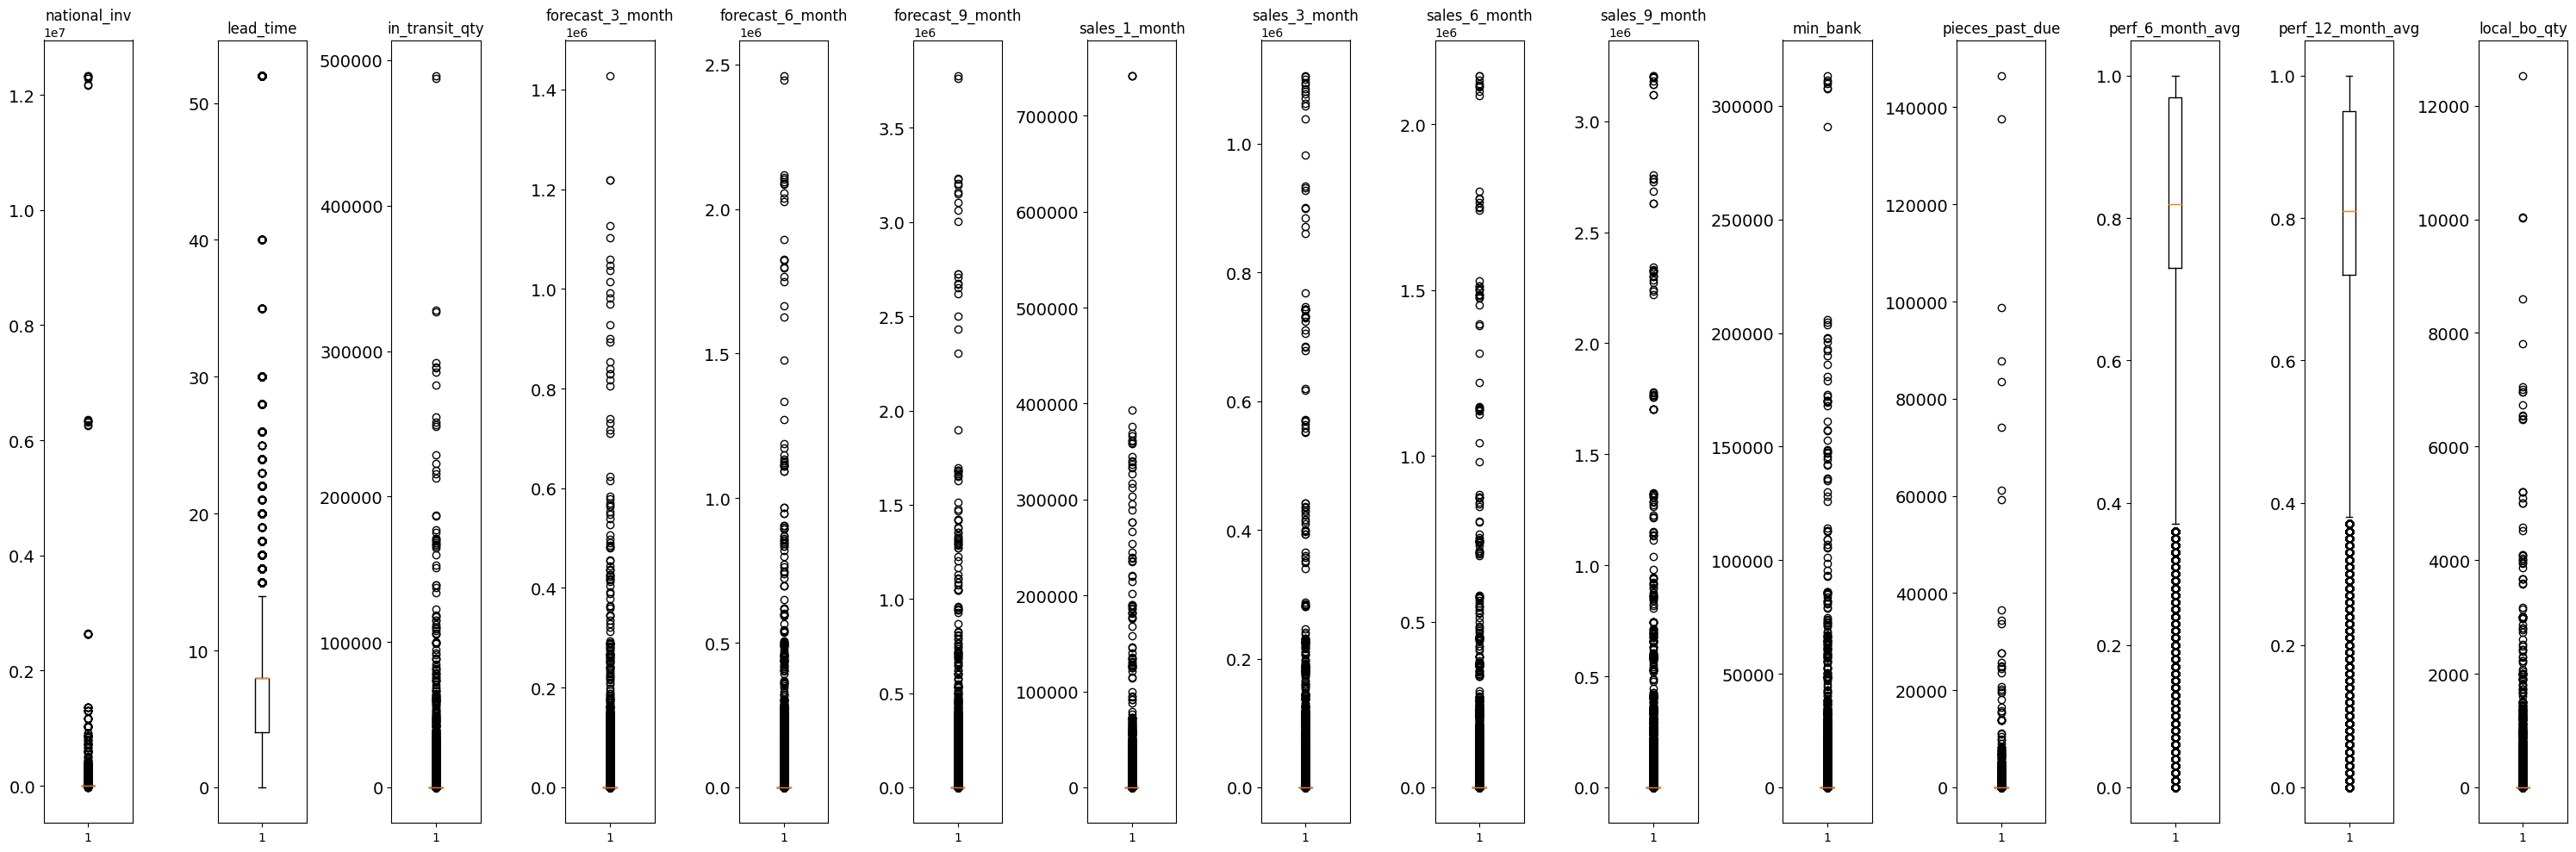

In [85]:
col_list = ['national_inv', 'lead_time', 'in_transit_qty',
            'forecast_3_month','forecast_6_month', 'forecast_9_month',
            'sales_1_month','sales_3_month', 'sales_6_month', 'sales_9_month',
            'min_bank','pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg','local_bo_qty']
num_df = df[col_list]

fig, axes = plt.subplots(1,len(num_df.columns), figsize=(30,10))
for i,ax in enumerate(axes.flat):
  ax.boxplot(num_df.iloc[:,i])
  ax.set_title(num_df.columns[i])
  ax.tick_params(axis = 'y',labelsize = 14)

plt.tight_layout()

KDE Plot
treat -99 values


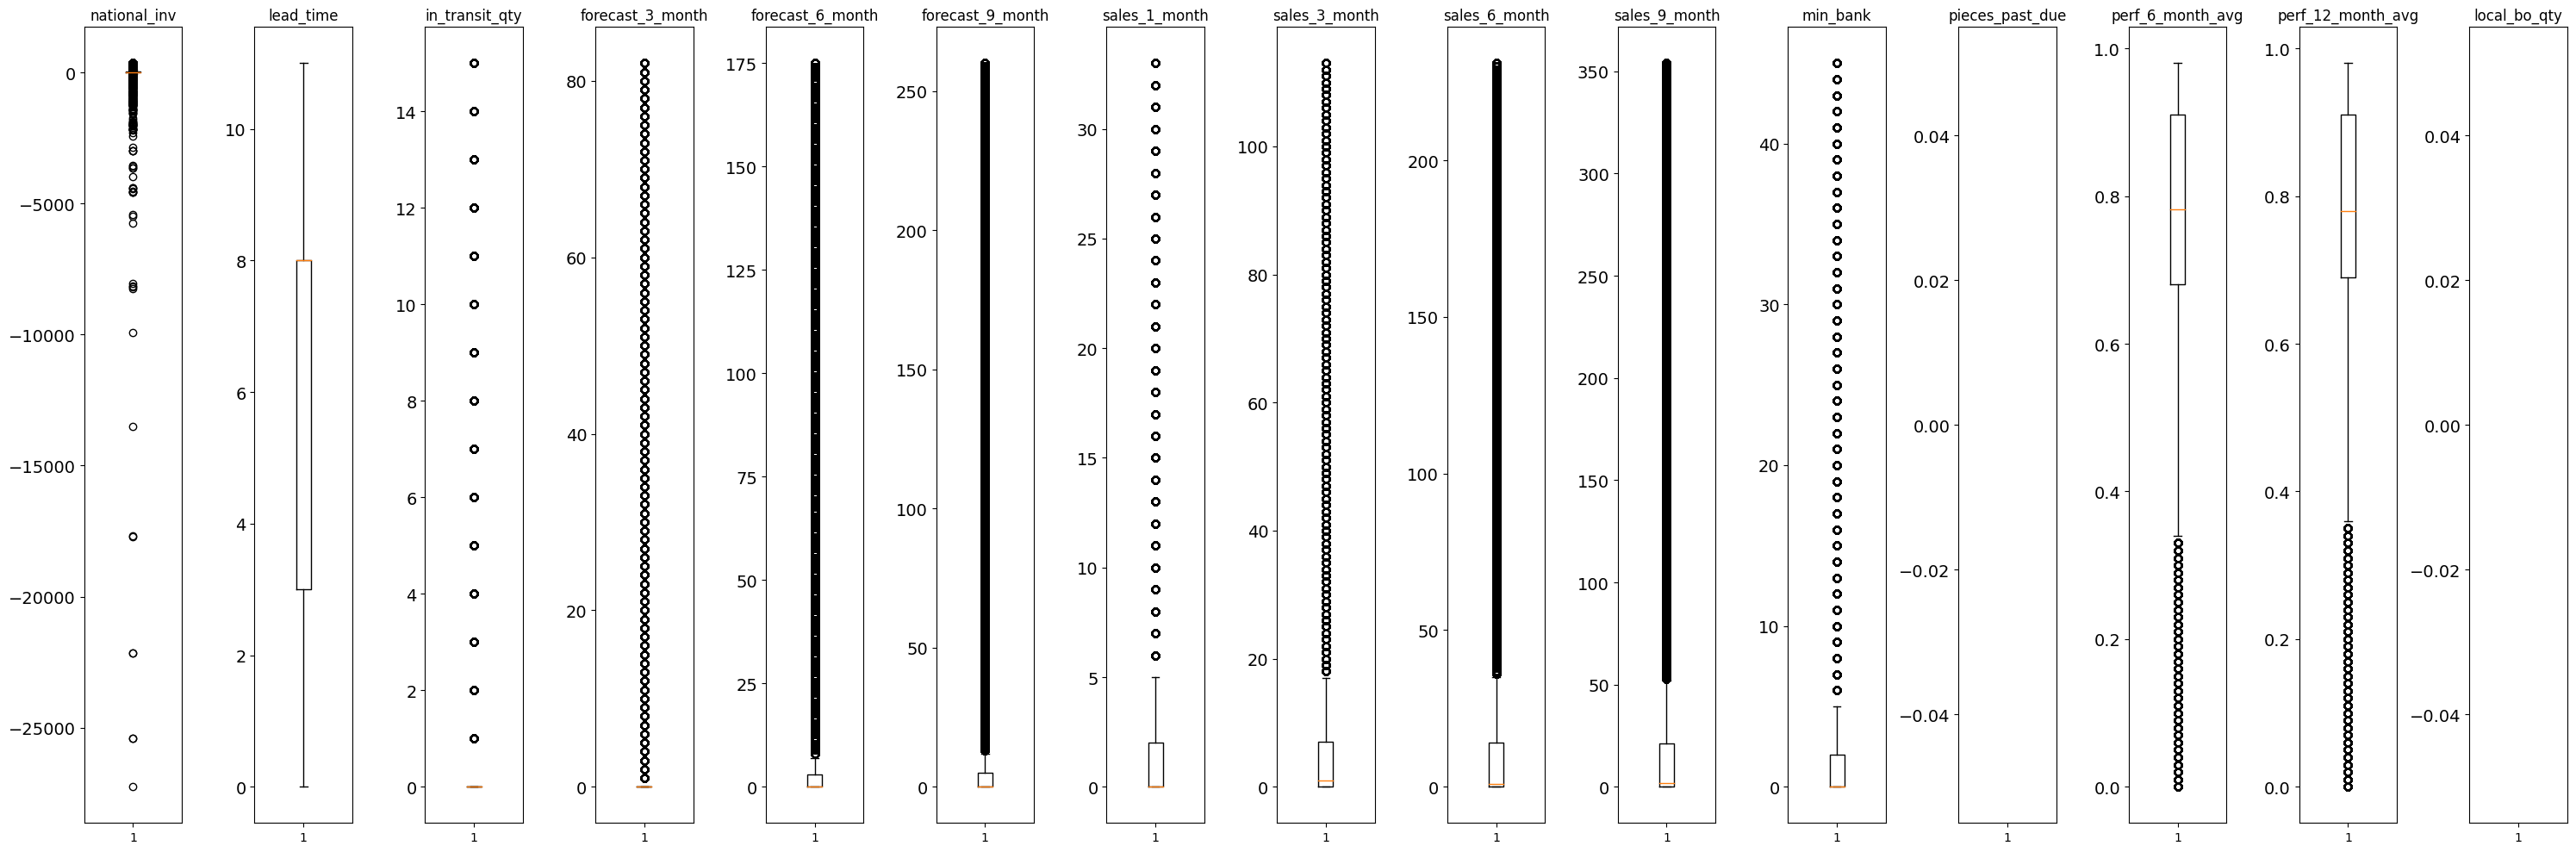

In [86]:
col_list = ['national_inv', 'lead_time', 'in_transit_qty',
            'forecast_3_month','forecast_6_month', 'forecast_9_month',
            'sales_1_month','sales_3_month', 'sales_6_month', 'sales_9_month',
            'min_bank','pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg','local_bo_qty']
num_df = df[col_list]

fig, axes = plt.subplots(1,len(num_df.columns), figsize=(30,10))
for i,ax in enumerate(axes.flat):
  col_df = num_df.iloc[:,i]
  col_df = col_df.loc[col_df < col_df.quantile(0.9)]
  ax.boxplot(col_df)
  ax.set_title(num_df.columns[i])
  ax.tick_params(axis = 'y',labelsize = 14)
plt.tight_layout()

In [ ]:
col_list = ['national_inv', 'lead_time', 'in_transit_qty',
            'forecast_3_month','forecast_6_month', 'forecast_9_month',
            'sales_1_month','sales_3_month', 'sales_6_month', 'sales_9_month',
            'min_bank','pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg','local_bo_qty']
num_df = df[col_list]
fig, axes = plt.subplots(figsize=(20,10), ncols=5, nrows=3)
i = 0
for row in range(1,3):
  for col in range(1,5):
    print(num_df.columns[i])
    sns.histplot(data = num_df,x = num_df.columns[i], ax=axes[row,col], kde=True)
    i=i+1
plt.show()

national_inv


In [ ]:
print(round(100*df['went_on_backorder'].value_counts()/len(df),3))
df['went_on_backorder'].value_counts().plot(kind = 'bar')

In [ ]:
col_list = ['deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','went_on_backorder']

Class Ratio:

f1 score: